In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch

print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

PyTorch version= 1.8.1+cu101
CUDA available= False


In [102]:
# A helper function to display properties of the Python objects
def describe(x):
    print(f"Type= {x.type()}")
    print(f"Shape/size= {x.shape}")
    print(f"Values= {x}")

# Random tensor, has dummy values from the computer memory - not initialized
describe(torch.Tensor(2, 3))

Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[-3.9123e-30,  3.0812e-41,  4.4842e-44],
        [ 4.4842e-44,  4.4842e-44,  4.4842e-44]])


In [103]:
import librosa
import librosa.display

In [104]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. [20 pts] Pre-process a single file using 20 frequency bins (i.e. M), and 2000 sampling frequency (controls the number of data points)

cat_1.wav file (signal) will generate 20 features, and 44 data points. Note that 2000Hz
sampling frequency in fact would ignore frequencies higher than 1000Hz and we assume
cats and dogs sounds are less than that range. Changing that limit to 3k, and 4k are
suggested, but then this will increase the number of data points to be processed.
Display the spectrogram in your notebook

In [105]:
Path_dataset = '/content/drive/MyDrive/JHU/AppliedMachineLearning/audioCatsDog/cats_dogs/'
SAMPLING_FRQ = 2000
M = 20



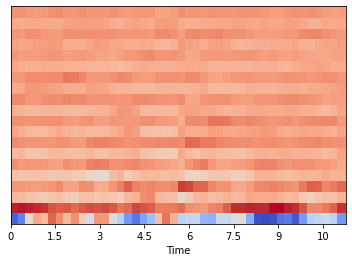

In [106]:
x, fs = librosa.load(Path_dataset+'cat_1.wav', sr=SAMPLING_FRQ)
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=M)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

# 2. [20 pts] For each wav file, you will have multiple data points, as generated by the librosa.feature.mfcc. 

Generate the X and y matrices for supervised learning. Apply your
favorite classifier and comment about your results. (Hint: Expect 80-90% 10-fold CV
accuracy, and N, M = 7634, 20)

In [107]:
mfccs.shape

(20, 44)

In [108]:
mfccs[:,0].shape

(20,)

In [109]:
import os

directory = os.path.join(Path_dataset)

Create X,y

In [110]:
%%time
X_list = []
y_list = []
for root,dirs,files in os.walk(directory):
    for file in files:
       if file.endswith(".wav"):
         x, fs = librosa.load(Path_dataset+file, sr=SAMPLING_FRQ)
         mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc=M)
         for i in range(mfccs.shape[1]):
           X_list.append(mfccs[:,i])
           if file.startswith("cat"):
             y_list.append(0)
           elif file.startswith("dog"):
             y_list.append(1)
    break # avoid recursion

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1884
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1847
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1969
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1960
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2032
  n_fft, y.shape[-1]


CPU times: user 34.8 s, sys: 30.1 s, total: 1min 4s
Wall time: 2min 14s


In [111]:
 X = np.asarray(X_list)
 y = np.asarray(y_list)

In [112]:
X.shape

(7634, 20)

In [113]:
y.shape

(7634,)

In [ ]:
np.bincount(y)[1]

In [115]:
np.bincount(y)[0]

5238

In [116]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [119]:
from sklearn.linear_model import LogisticRegression
pipe_lr = LogisticRegression(random_state=14,
               penalty='l1',
               solver='liblinear',
               max_iter=10000)

In [120]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X, y)
scores = []
for k, (train, test) in enumerate(kfold):
     pipe_lr.fit(X[train], y[train])
     score = pipe_lr.score(X[test], y[test])
     scores.append(score)
     print('Fold: %2d, Acc: %.3f' % (k+1, score))
np.mean(scores)

Fold:  1, Acc: 0.789
Fold:  2, Acc: 0.728
Fold:  3, Acc: 0.753
Fold:  4, Acc: 0.829
Fold:  5, Acc: 0.889
Fold:  6, Acc: 0.906
Fold:  7, Acc: 0.934
Fold:  8, Acc: 0.900
Fold:  9, Acc: 0.712
Fold: 10, Acc: 0.712


0.8150592178847619